In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# from scipy.stats import norm
# from sklearn import preprocessing
# from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
fileName = 'C:/Users/kazIm/Desktop/projects/IE490/input/tubitak_data2_processesed.csv'
df = pd.read_csv(fileName,  sep = ',')

In [3]:
#preview data
df.head()

,ilce_kod,mahalle_kod,bagimsiz_bolum_kat,yuzolcumu,yasal_burut_alani,mevcut_alani,adil_piyasa_degeri_yasal_durum,area,duration
0,85,55035,0.0,478.33,85.0,85.0,62000.0,19.765702,0
1,86,57190,1.0,7961.00,97.0,97.0,100000.0,70.000000,0
2,80,3835,-1.0,722.00,100.0,100.0,85000.0,36.000000,0
3,80,3837,-2.0,353.00,51.0,51.0,45000.0,32.000000,0
4,86,57190,1.0,667.00,97.0,97.0,110000.0,56.000000,0


### Ilce 79

In [4]:
df.drop(df.index[df.ilce_kod!=79],inplace=True)
# df
df.drop('ilce_kod',axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135 entries, 209 to 101644
Data columns (total 8 columns):
mahalle_kod                       1135 non-null int64
bagimsiz_bolum_kat                1135 non-null float64
yuzolcumu                         1135 non-null float64
yasal_burut_alani                 1135 non-null float64
mevcut_alani                      1135 non-null float64
adil_piyasa_degeri_yasal_durum    1135 non-null float64
area                              1135 non-null float64
duration                          1135 non-null int64
dtypes: float64(6), int64(2)
memory usage: 79.8 KB


In [6]:
mahalle = df["mahalle_kod"]

In [7]:
dfmahalle_kod'].describe()

count    1135.000000
mean     4673.550661
std         1.064431
min      4673.000000
25%      4673.000000
50%      4673.000000
75%      4673.000000
max      4676.000000
Name: mahalle_kod, dtype: float64

In [8]:
#we can drop yasal burut alani as it has almost 1 correlation with mevcut alan
df = df.drop('yasal_burut_alani',axis=1)

In [9]:
mahalle = df['mahalle_kod']

### One Hot Encoding for Categorical Variables

In [10]:
# df = pd.get_dummies(df, columns=["ilce_kod"])
df = pd.get_dummies(df, columns=["mahalle_kod"])

In [11]:
df.head()

,bagimsiz_bolum_kat,yuzolcumu,mevcut_alani,adil_piyasa_degeri_yasal_durum,area,duration,mahalle_kod_4673,mahalle_kod_4674,mahalle_kod_4675,mahalle_kod_4676
209,1.0,875.0,125.0,115000.0,60.000000,4,1,0,0,0
361,2.0,585.0,125.0,120000.0,60.000000,13,1,0,0,0
593,3.0,629.0,136.0,115000.0,50.000000,0,1,0,0,0
725,3.0,1252.0,133.0,90000.0,60.000000,1,1,0,0,0
809,2.0,968.0,178.0,130000.0,322.666667,2,0,0,1,0


In [12]:
df.shape

(1135, 10)

In [17]:
# split into input (X) and output (y) variables
X = df.drop('adil_piyasa_degeri_yasal_durum',axis=1)
y = df['adil_piyasa_degeri_yasal_durum']

In [18]:
print(X.shape)
print(y.shape)

(1135, 9)
(1135,)


## 2. Neural Network

### Data Preprocessing 

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler1 = StandardScaler().fit(X)
scaler2 = StandardScaler().fit(y.reshape(-1,1))
X_ = scaler1.transform(X)
y_ = scaler2.transform(y.reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split( X_, y_, test_size=0.15, random_state=42)


In [ ]:
# scaler2.inverse_transform(y_)


In [20]:
from keras.models import Sequential
from keras.layers import Dense, Activation#,Dropout, Conv1D, MaxPooling1D, Flatten
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV

# fix random seed for reproducibility


dims = X_.shape[1]
# print(dims, 'dims')
# print('Building model...')

# Function to plot history of model learning 
def plot_history(network_history):
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

#     plt.figure()
#     plt.xlabel('Epochs')
#     plt.ylabel('Accuracy')
#     plt.plot(network_history.history['acc'])
#     plt.plot(network_history.history['val_acc'])
#     plt.legend(['Training', 'Validation'])
#     plt.show()

# Function to create model     
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(dims, input_shape=(dims,), init = 'normal', activation='relu'))
#     model.add(Dropout(rate=0.0))
    model.add(Dense(10, init = 'normal', activation='relu'))
#     model.add(Dropout(rate=0.0))
    model.add(Dense(5, init = 'normal', activation='relu'))
#     model.add(Dropout(rate=0.0))
    model.add(Dense(1, init = 'normal'))
    # compile model
#     sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='mse', optimizer = 'adam',metrics=['accuracy'])
    model.summary()
    return model


def train_model(modell, xtrain, ytrain, xval, yval):
    fBestModel = 'best_model.h5' 
    early_stop = EarlyStopping(monitor='val_loss', patience=30, verbose=1) 
    best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)
    
    history = modell.fit(xtrain, ytrain, batch_size=128, epochs=400, verbose=0, 
                         validation_data=(xval, yval), callbacks=[best_model, early_stop])# early stopping
    return history



Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                100       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
Epoch 00121: early stopping


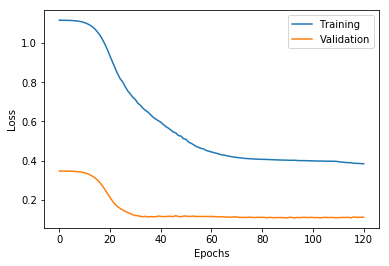

In [21]:
try:
    del model
except:
    pass
np.random.seed(0)
# create model
model = create_model()

# plot the history of learning
history = train_model(model,X_train,y_train,X_test,y_test)
plot_history(history)



In [22]:
pred = model.predict(X_test) 
pred = scaler1.inverse_transform(pred)
# actual = y_test.reshape(-1,1)
actual = scaler2.inverse_transform(y_test)
error = np.abs(pred-actual)/actual


### Rate of houses that have less than 20% prediction error  

In [23]:
error[error<=0.2].shape[0]/y_test.shape[0]


0.8362573099415205

** Accuracy = 85% **

In [26]:
print('mean of error:',np.mean(error))
print('standard deviation of error:',np.std(error))

mean of error: 0.133285743237
standard deviation of error: 0.160657318754


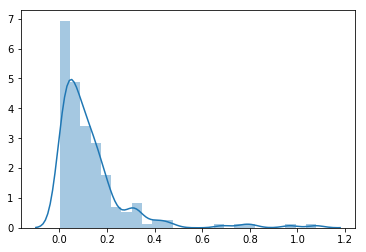

In [27]:
sns.distplot(error)


In [ ]:
# from sklearn.model_selection import StratifiedKFold

# define 3-fold cross validation test harness
# kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
# for (train,test) in kfold.split(X_,y_.flatten()):
#     train
# cvscores = []
# for train, test in kfold.split(X_, y_):
#   # create model
#     model = Sequential()
#     model.add(Dense(dims, input_shape=(dims,), init='normal', activation='relu'))
#     model.add(Dense(10, init='normal', activation='relu'))
#     model.add(Dense(1, init='normal'))
#     model.compile(loss='mse', optimizer = 'adam')
#     # Compile model
#     model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
#     # Fit the model
#     model.fit(X[train], y[train], epochs=150, batch_size=10, verbose=1)
#     # evaluate the model
#     scores = model.evaluate(X[test], y[test], verbose=0)
#     print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#     cvscores.append(scores[1] * 100)
# print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
